In [5]:
import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
import emcee
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [6]:
df = pd.read_csv('../data/io_preliminary_results.csv')

In [7]:
df

,brightness,brightness_unc,gaussian_width,gaussian_width_unc,int_wv,obs_line_center,obs_line_center_unc
0,-2.103678,0.250000,0.106316,0.018278,1208.8500,1208.989728,0.013482
1,-18.441230,1329.478442,0.072736,0.010987,1211.2120,1210.810635,0.323317
2,64.450530,1915.270798,0.054832,0.001484,1211.3800,1211.370326,0.002985
3,46.788705,5.993645,0.168954,0.004692,1212.7950,1212.952079,0.003644
4,52.813036,220.339185,0.036392,0.001781,1218.5950,1218.616321,0.000677
5,13.499011,0.431633,0.036740,0.000287,1224.4240,1224.440194,0.000568
6,15.953598,0.574690,0.036689,0.000297,1224.4790,1224.440132,0.000611
7,13.324357,0.420225,0.036760,0.000287,1224.5440,1224.440144,0.000573
8,8.365049,4.550675,0.117383,0.132922,1227.0890,1227.071611,0.210937
9,9.541020,0.155207,0.183237,0.001257,1233.9220,1234.109719,0.001236


In [10]:
df_wv = df['int_wv']
df_obs = df['obs_line_center']

In [13]:
df_diff = df_wv-df_obs
df_diff

0    -0.139728
1     0.401365
2     0.009674
3    -0.157079
4    -0.021321
5    -0.016194
6     0.038868
7     0.103856
8     0.017389
9    -0.187719
10    0.218472
11    0.366951
12   -0.204423
13    0.156353
14   -0.592345
15   -0.568282
16    0.257461
17   -0.348369
18   -0.102386
19   -0.074868
20    0.000033
21   -0.000003
22    0.000022
23   -0.092193
24    0.434551
25    0.016523
26    0.574678
27   -0.044938
28    0.639458
29   -0.073386
30    2.048317
31   -0.389952
32   -0.035533
33    0.040388
34   -0.018791
35   -0.011520
36   -0.151157
37   -0.060235
38   -0.040285
39   -0.291120
40    0.317595
41    0.053725
42   -0.050338
43    0.053491
44   -0.228124
45   -0.082172
46   -0.071060
47    0.113422
48    0.000014
49   -0.000042
50   -0.000027
51    0.000011
dtype: float64

Let's see if we can tell how much the lines shifted based on the MCMC process which also predicts a center wavelength.

0.03478900345578058
0.364562451612243


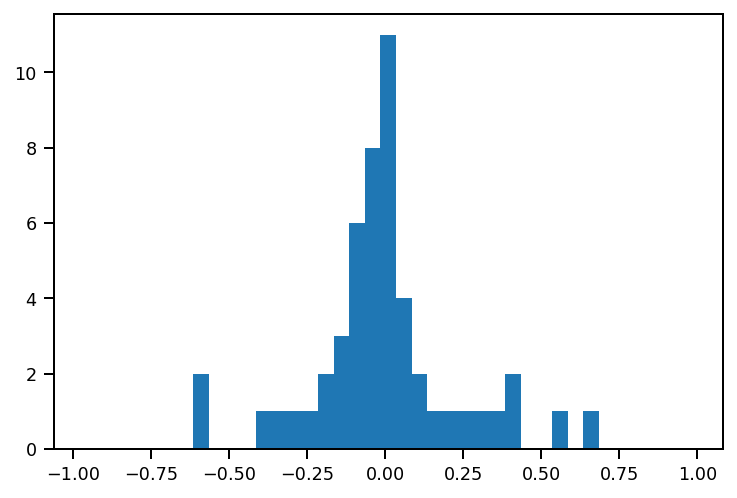

In [22]:
diff_mean = np.mean(df_diff)
diff_std = np.std(df_diff)
plt.hist(df_diff, bins = np.arange(diff_mean-1, diff_mean+1, 0.05));
print(diff_mean)
print(diff_std)